In [1]:
pip install tensorflow keras opencv-python matplotlib seaborn scikit-learn numpy pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def load_data(data_dir):
    labels = []
    images = []
    for expression in os.listdir(data_dir):
        expression_path = os.path.join(data_dir, expression)
        for img_file in os.listdir(expression_path):
            img_path = os.path.join(expression_path, img_file)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (48, 48))
            images.append(image)
            labels.append(expression)
    return np.array(images), np.array(labels)

# Load train and test data
X_train, y_train = load_data("archive/train")
X_test, y_test = load_data("archive/test")

# Reshape and normalize
X_train = X_train.reshape(-1, 48, 48, 1) / 255.0
X_test = X_test.reshape(-1, 48, 48, 1) / 255.0

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# One-hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Classes:", encoder.classes_)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'archive/train'

In [3]:
import os
print(os.getcwd())


C:\Users\Deeksha\Desktop\FacialEmotionProject\archive


In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# ✅ Set working directory to where 'archive' folder is present
os.chdir("C:/Users/Deeksha/Desktop/FacialEmotionProject")  # <-- update path if needed
print("Current Directory:", os.getcwd())

# ✅ Load images and labels
def load_data(data_dir):
    images = []
    labels = []
    for expression in os.listdir(data_dir):
        expression_path = os.path.join(data_dir, expression)
        if os.path.isdir(expression_path):
            for img_file in os.listdir(expression_path):
                img_path = os.path.join(expression_path, img_file)
                try:
                    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (48, 48))
                    images.append(image)
                    labels.append(expression)
                except:
                    print(f"Error loading: {img_path}")
    return np.array(images), np.array(labels)

# ✅ Load training and testing data
X_train, y_train = load_data("archive/train")
X_test, y_test = load_data("archive/test")

# ✅ Reshape and Normalize the images
X_train = X_train.reshape(-1, 48, 48, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 48, 48, 1).astype('float32') / 255.0

# ✅ Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# ✅ One-hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ✅ Print classes
print("Emotion Classes Detected:", list(encoder.classes_))


Current Directory: C:\Users\Deeksha\Desktop\FacialEmotionProject
Emotion Classes Detected: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# 🧠 Build the CNN model
model = Sequential()

# Layer 1
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # prevents overfitting
model.add(Dense(y_train.shape[1], activation='softmax'))  # output layer

# 🧪 Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 📜 Summary
model.summary()


C:\Users\Deeksha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 46, 46, 64)    │          640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization           │ (None, 46, 46, 64)    │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 23, 23, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 23, 23, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 21, 21, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_1         │ (None, 21, 21, 128)   │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 10, 10, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 10, 10, 128)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 8, 8, 256)     │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_2         │ (None, 8, 8, 256)     │        1,024 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 4, 4, 256)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_2 (Dropout)           │ (None, 4, 4, 256)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 4096)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 512)           │    2,097,664 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_3 (Dropout)           │ (None, 512)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 7)             │        3,591 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 2,472,711 (9.43 MB)

 Trainable params: 2,471,815 (9.43 MB)

 Non-trainable params: 896 (3.50 KB)

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# 📌 Save the best model during training
checkpoint = ModelCheckpoint("emotion_model_best.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# ⏱️ Train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint]
)


Epoch 1/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.2978 - loss: 2.3290
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 106s 287ms/step - accuracy: 0.2979 - loss: 2.3274 - val_accuracy: 0.0000e+00 - val_loss: 8.6349
Epoch 2/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.4161 - loss: 1.4429
Epoch 2: val_accuracy improved from 0.00000 to 0.00070, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 105s 293ms/step - accuracy: 0.4161 - loss: 1.4428 - val_accuracy: 6.9662e-04 - val_loss: 10.4618
Epoch 3/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.4663 - loss: 1.3468
Epoch 3: val_accuracy did not improve from 0.00070
359/359 ━━━━━━━━━━━━━━━━━━━━ 104s 289ms/step - accuracy: 0.4663 - loss: 1.3468 - val_accuracy: 0.0000e+00 - val_loss: 12.9968
Epoch 4/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.4968 - loss: 1.2772
Epoch 4: val_accuracy improved from 0.00070 to 0.01463, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 103s 286ms/step - accuracy: 0.4968 - loss: 1.2772 - val_accuracy: 0.0146 - val_loss: 14.2211
Epoch 5/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5290 - loss: 1.2034
Epoch 5: val_accuracy improved from 0.01463 to 0.01515, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.5290 - loss: 1.2034 - val_accuracy: 0.0152 - val_loss: 18.5020
Epoch 6/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5419 - loss: 1.1787
Epoch 6: val_accuracy improved from 0.01515 to 0.02072, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.5419 - loss: 1.1787 - val_accuracy: 0.0207 - val_loss: 18.3661
Epoch 7/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.5545 - loss: 1.1438
Epoch 7: val_accuracy did not improve from 0.02072
359/359 ━━━━━━━━━━━━━━━━━━━━ 112s 311ms/step - accuracy: 0.5545 - loss: 1.1438 - val_accuracy: 0.0141 - val_loss: 16.3967
Epoch 8/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5708 - loss: 1.1122
Epoch 8: val_accuracy did not improve from 0.02072
359/359 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.5708 - loss: 1.1122 - val_accuracy: 0.0014 - val_loss: 20.9341
Epoch 9/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5763 - loss: 1.0847
Epoch 9: val_accuracy improved from 0.02072 to 0.06809, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 109s 303ms/step - accuracy: 0.5763 - loss: 1.0847 - val_accuracy: 0.0681 - val_loss: 22.5021
Epoch 10/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.5983 - loss: 1.0471
Epoch 10: val_accuracy did not improve from 0.06809
359/359 ━━━━━━━━━━━━━━━━━━━━ 108s 302ms/step - accuracy: 0.5983 - loss: 1.0471 - val_accuracy: 0.0216 - val_loss: 26.7591
Epoch 11/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.6103 - loss: 1.0188
Epoch 11: val_accuracy did not improve from 0.06809
359/359 ━━━━━━━━━━━━━━━━━━━━ 110s 306ms/step - accuracy: 0.6103 - loss: 1.0188 - val_accuracy: 0.0301 - val_loss: 22.2767
Epoch 12/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.6248 - loss: 0.9761
Epoch 12: val_accuracy improved from 0.06809 to 0.11494, saving model to emotion_model_best.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 110s 306ms/step - accuracy: 0.6248 - loss: 0.9762 - val_accuracy: 0.1149 - val_loss: 22.7270
Epoch 13/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6314 - loss: 0.9527
Epoch 13: val_accuracy did not improve from 0.11494
359/359 ━━━━━━━━━━━━━━━━━━━━ 107s 298ms/step - accuracy: 0.6314 - loss: 0.9528 - val_accuracy: 0.0402 - val_loss: 26.4900
Epoch 14/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.6430 - loss: 0.9328
Epoch 14: val_accuracy did not improve from 0.11494
359/359 ━━━━━━━━━━━━━━━━━━━━ 103s 287ms/step - accuracy: 0.6430 - loss: 0.9328 - val_accuracy: 0.0348 - val_loss: 22.6917
Epoch 15/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.6545 - loss: 0.9014
Epoch 15: val_accuracy did not improve from 0.11494
359/359 ━━━━━━━━━━━━━━━━━━━━ 111s 310ms/step - accuracy: 0.6544 - loss: 0.9014 - val_accuracy: 0.0219 - val_loss: 20.3051
Epoch 16/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.6718 - loss: 0.8652


359/359 ━━━━━━━━━━━━━━━━━━━━ 99s 276ms/step - accuracy: 0.6898 - loss: 0.8204 - val_accuracy: 0.1261 - val_loss: 25.4174
Epoch 19/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7025 - loss: 0.7821
Epoch 19: val_accuracy did not improve from 0.12609
359/359 ━━━━━━━━━━━━━━━━━━━━ 99s 275ms/step - accuracy: 0.7025 - loss: 0.7822 - val_accuracy: 0.0329 - val_loss: 17.5801
Epoch 20/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.7053 - loss: 0.7810
Epoch 20: val_accuracy did not improve from 0.12609
359/359 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.7053 - loss: 0.7810 - val_accuracy: 0.1130 - val_loss: 28.3876
Epoch 21/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.7162 - loss: 0.7529
Epoch 21: val_accuracy did not improve from 0.12609
359/359 ━━━━━━━━━━━━━━━━━━━━ 106s 295ms/step - accuracy: 0.7161 - loss: 0.7530 - val_accuracy: 0.0860 - val_loss: 32.5487
Epoch 22/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7217 - loss: 0.7171
Ep

359/359 ━━━━━━━━━━━━━━━━━━━━ 111s 309ms/step - accuracy: 0.7337 - loss: 0.7034 - val_accuracy: 0.1331 - val_loss: 38.5289
Epoch 24/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7418 - loss: 0.6812
Epoch 24: val_accuracy did not improve from 0.13305
359/359 ━━━━━━━━━━━━━━━━━━━━ 105s 292ms/step - accuracy: 0.7418 - loss: 0.6812 - val_accuracy: 0.0902 - val_loss: 34.9019
Epoch 25/25
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.7521 - loss: 0.6671
Epoch 25: val_accuracy did not improve from 0.13305
359/359 ━━━━━━━━━━━━━━━━━━━━ 101s 282ms/step - accuracy: 0.7521 - loss: 0.6672 - val_accuracy: 0.1158 - val_loss: 33.6651


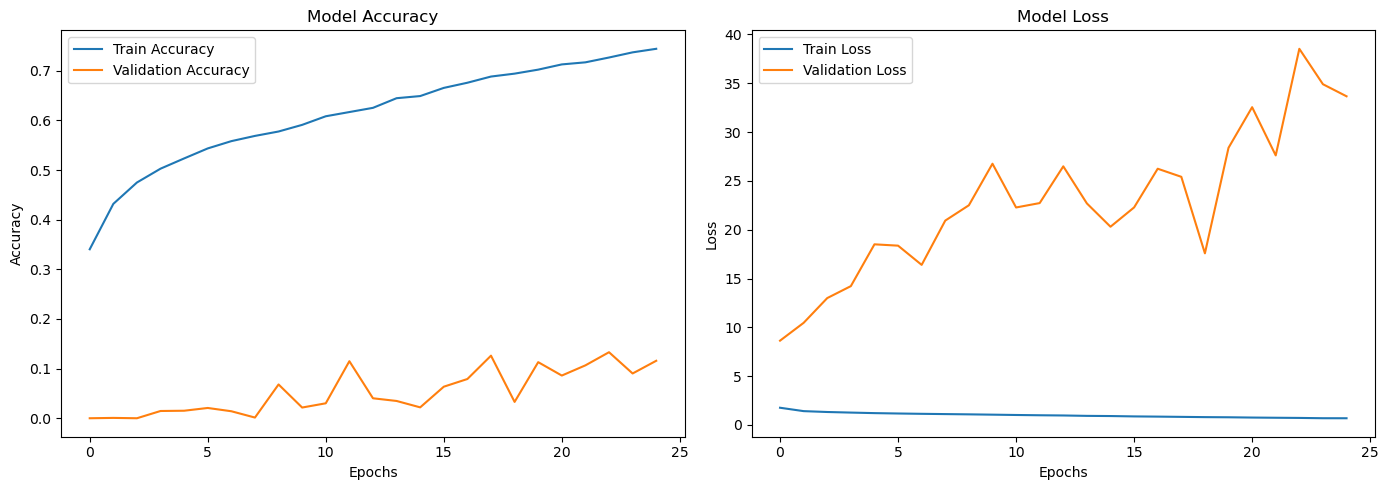

In [7]:
# 📈 Accuracy and Loss Graphs
plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.5939 - loss: 1.7136

✅ Test Accuracy: 51.27%
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step

📋 Classification Report:

              precision    recall  f1-score   support

       angry       0.49      0.54      0.51       958
     disgust       0.86      0.29      0.43       111
        fear       0.29      0.60      0.39      1024
       happy       0.81      0.79      0.80      1774
     neutral       0.50      0.59      0.54      1233
         sad       0.48      0.30      0.37      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.51      7178
   macro avg       0.49      0.45      0.44      7178
weighted avg       0.49      0.51      0.49      7178



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


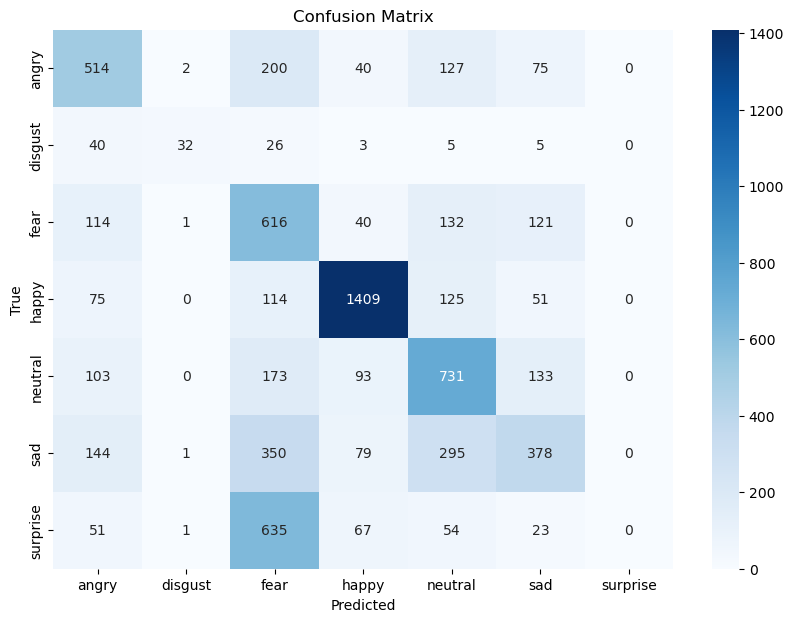

In [8]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 🔄 Load the best saved model
model = load_model("emotion_model_best.h5")

# 🎯 Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# 📌 Predict labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 🧾 Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_))

# 📉 Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


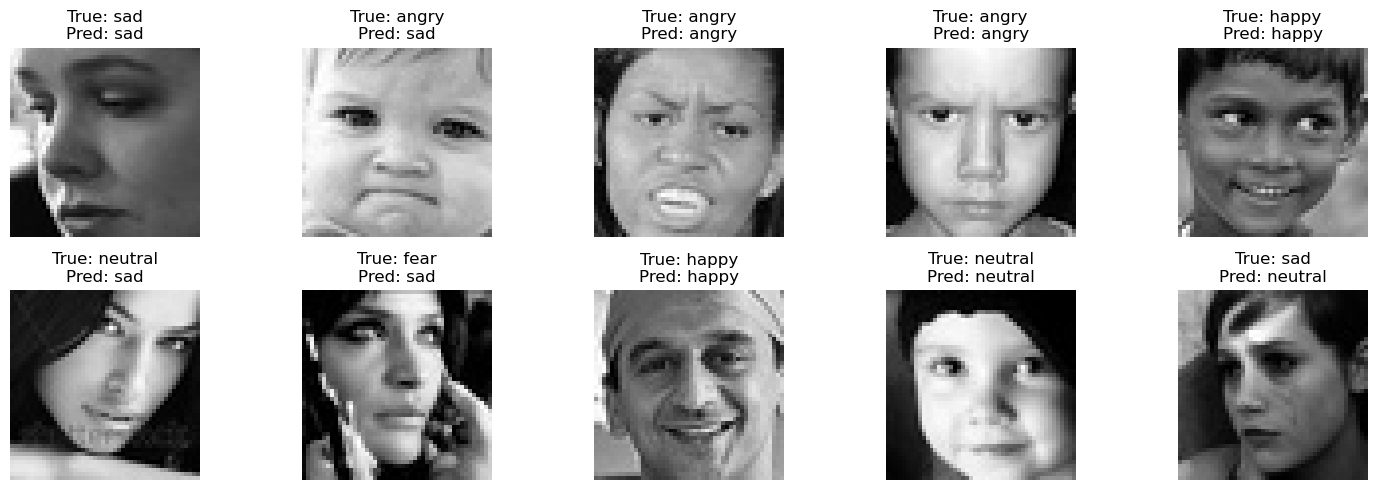

In [9]:
import random

# Show 10 random test images with predicted and actual emotions
plt.figure(figsize=(15, 5))
for i in range(10):
    idx = random.randint(0, len(X_test) - 1)
    img = X_test[idx].reshape(48, 48)
    true_label = encoder.classes_[y_true[idx]]
    pred_label = encoder.classes_[y_pred_classes[idx]]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import pyttsx3
import time

# Load the trained model
model = load_model("emotion_model_best.h5")

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Emotion labels from encoder
emotion_labels = encoder.classes_

# Voice engine setup
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Start webcam
cap = cv2.VideoCapture(0)

last_spoken_time = time.time()
spoken_interval = 5  # seconds

print("🔴 Starting real-time emotion deqtection. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscaleimport cv2
i
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi = gray[y:y + h, x:x + w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.reshape(roi_normalized, (1, 48, 48, 1))
        
        # Predict emotion
        prediction = model.predict(roi_reshaped)
        max_index = int(np.argmax(prediction))
        predicted_emotion = emotion_labels[max_index]
        confidence = np.max(prediction) * 100

        # Draw rectangle and emotion label
        color = (0, 255, 0) if predicted_emotion == 'Happy' else (255, 0, 0)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        label = f"{predicted_emotion} ({confidence:.1f}%)"
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # 🗣️ Voice feedback every 5 seconds
        current_time = time.time()
        if current_time - last_spoken_time > spoken_interval:
            engine.say(f"You look {predicted_emotion.lower()}")
            engine.runAndWait()
            last_spoken_time = current_time

    # Display the frame
    cv2.imshow("Real-Time Emotion Detection", frame)

    # Break on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release
cap.release()
cv2.destroyAllWindows()


In [12]:
import pandas as pd
from datetime import datetime

# Initialize log list
emotion_log = []


In [13]:
        # Log emotion with timestamp
        timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        emotion_log.append([timestamp, predicted_emotion, f"{confidence:.2f}"])


In [14]:
# Save emotion log to CSV
log_df = pd.DataFrame(emotion_log, columns=["Timestamp", "Emotion", "Confidence"])
log_filename = f"emotion_log_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
log_df.to_csv(log_filename, index=False)
print(f"\n📁 Emotion log saved as: {log_filename}")



📁 Emotion log saved as: emotion_log_20250627_222110.csv


In [15]:
!pip install gTTS playsound


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7044 sha256=170fb6670341b57b178d752ad229878695923c2297e08935734114274d30ff52
  Stored in directory: c:\users\deeksha\appdata\local\pip\cache\wheels\cf\42\ff\7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound

   -------------------- ------------------- 1/2 [gTTS]
   -------------------- ------------------- 1/2 [gTTS]
   ---------------------------------------- 2/2 [gTTS]



  DEPRECATION: Building 'playsound' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'playsound'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
def speak_emotion(emotion, language='hi'):
    translations = {
        "happy": {"hi": "आप खुश हैं", "kn": "ನೀವು ಖುಷಿಯಾಗಿದ್ದೀರಿ"},
        "sad": {"hi": "आप दुखी हैं", "kn": "ನೀವು ದುಃಖಿತರಾಗಿದ್ದೀರಿ"},
        "angry": {"hi": "आप गुस्से में हैं", "kn": "ನೀವು ಕೋಪಗೊಂಡಿದ್ದೀರಿ"},
        "surprise": {"hi": "आप आश्चर्यचकित हैं", "kn": "ನೀವು ಆಶ್ಚರ್ಯಚಕಿತರಾಗಿದ್ದೀರಿ"},
        "neutral": {"hi": "आप सामान्य हैं", "kn": "ನೀವು ಸಾಮಾನ್ಯವಾಗಿದ್ದೀರಿ"},
        "fear": {"hi": "आप डरे हुए हैं", "kn": "ನೀವು ಭಯಭೀತರಾಗಿದ್ದೀರಿ"},
        "disgust": {"hi": "आपको घिन आ रही है", "kn": "ನೀವು ಅಸಹ್ಯಪಡುತ್ತೀರಿ"}
    }

    if emotion not in translations:
        return

    text = translations[emotion].get(language, "भावना पहचानी नहीं गई")
    tts = gTTS(text=text, lang=language)
    
    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as fp:
        temp_path = fp.name
        tts.save(temp_path)
    
    playsound(temp_path)
    os.remove(temp_path)


In [30]:
def speak_emotion(emotion, last_spoken_time, interval=5):
    ...
    return updated_last_spoken_time


In [31]:
import pyttsx3
import time

# Initialize TTS engine globally
engine = pyttsx3.init()
engine.setProperty('rate', 150)

def speak_emotion(emotion, last_spoken_time, interval=5):
    current_time = time.time()
    if current_time - last_spoken_time >= interval:
        engine.say(f"You look {emotion.lower()}")
        engine.runAndWait()
        return current_time  # Update last_spoken_time
    return last_spoken_time  # No update if interval not passed


In [32]:
# Voice every 5 seconds
current_time = time.time()
if current_time - last_spoken_time > spoken_interval:
    engine.say(f"You look {predicted_emotion.lower()}")
    engine.runAndWait()
    last_spoken_time = current_time


In [33]:
# Speak emotion if enough time has passed
last_spoken_time = speak_emotion(predicted_emotion, last_spoken_time, spoken_interval)


In [34]:
# Webcam loop
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.reshape(roi_normalized, (1, 48, 48, 1))

        prediction = model.predict(roi_reshaped, verbose=0)
        emotion_index = np.argmax(prediction)
        predicted_emotion = emotion_labels[emotion_index]
        confidence = np.max(prediction) * 100

        # Drawing on the frame
        color = (0, 255, 0) if predicted_emotion == 'Happy' else (255, 0, 0)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, f"{predicted_emotion} ({confidence:.1f}%)", 
                    (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Voice feedback using function
        last_spoken_time = speak_emotion(predicted_emotion, last_spoken_time, spoken_interval)

    cv2.imshow("Real-Time Emotion Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [35]:
import cv2
import numpy as np
import pyttsx3
import time
from tensorflow.keras.models import load_model
import pickle

# Load the trained model
model = load_model("emotion_model_best.h5")

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Load emotion labels using your saved encoder
with open("emotion_label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)
emotion_labels = encoder.classes_

# Setup TTS engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Speak function
def speak_emotion(emotion, last_spoken, interval=5):
    current = time.time()
    if current - last_spoken > interval:
        engine.say(f"You look {emotion.lower()}")
        engine.runAndWait()
        return current
    return last_spoken

# Initialize webcam
cap = cv2.VideoCapture(0)
last_spoken_time = 0  # Initialize timer
spoken_interval = 5   # 5 seconds interval

print("🔴 Starting Real-Time Emotion Detection. Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.reshape(roi_normalized, (1, 48, 48, 1))

        prediction = model.predict(roi_reshaped, verbose=0)
        emotion_index = np.argmax(prediction)
        predicted_emotion = emotion_labels[emotion_index]
        confidence = np.max(prediction) * 100

        # Draw rectangle and label
        color = (0, 255, 0) if predicted_emotion == 'Happy' else (255, 0, 0)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        label = f"{predicted_emotion} ({confidence:.1f}%)"
        cv2.putText(frame, label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Speak Emotion
        last_spoken_time = speak_emotion(predicted_emotion, last_spoken_time, spoken_interval)

    # Display window
    cv2.imshow("Real-Time Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] No such file or directory: 'emotion_label_encoder.pkl'

In [36]:
# Required Libraries
import cv2
import numpy as np
import pyttsx3
import time
from tensorflow.keras.models import load_model

# Load trained CNN model
model = load_model("model.h5")

# Initialize face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Emotion labels (hardcoded for FER-2013 order)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Define speak function
def speak_emotion(emotion, last_spoken, interval=5):
    current = time.time()
    if current - last_spoken > interval:
        engine.say(f"You look {emotion.lower()}")
        engine.runAndWait()
        return current
    return last_spoken

# Webcam loop
cap = cv2.VideoCapture(0)
last_spoken_time = 0
spoken_interval = 5

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.reshape(roi_normalized, (1, 48, 48, 1))

        prediction = model.predict(roi_reshaped, verbose=0)
        emotion_index = np.argmax(prediction)
        predicted_emotion = emotion_labels[emotion_index]
        confidence = np.max(prediction) * 100

        # Draw rectangle and label
        color = (0, 255, 0) if predicted_emotion == 'Happy' else (255, 0, 0)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, f"{predicted_emotion} ({confidence:.1f}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

        # Voice feedback
        last_spoken_time = speak_emotion(predicted_emotion, last_spoken_time, spoken_interval)

    cv2.imshow("Real-Time Emotion Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [37]:
import os
print(os.listdir())


['anaconda_projects', 'archive', 'best_emotion_model.h5', 'emotion_classes.npy', 'emotion_log_20250627_222110.csv', 'emotion_model_best.h5']


In [38]:
import cv2
import numpy as np
import pyttsx3
import time
from tensorflow.keras.models import load_model

# Load your actual trained model
model = load_model("emotion_model_best.h5")

# Emotion classes - update this based on your dataset order
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialize pyttsx3 for text-to-speech
engine = pyttsx3.init()
engine.setProperty('rate', 150)

# Speak function
def speak_emotion(emotion):
    engine.say(f"You look {emotion.lower()}")
    engine.runAndWait()

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start video capture
cap = cv2.VideoCapture(0)

print("🔵 Real-time Emotion Detection Started... Press 'q' to quit.")

last_spoken_emotion = None
last_spoken_time = 0
speak_interval = 5  # seconds

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi, (48, 48))
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.reshape(roi_normalized, (1, 48, 48, 1))

        prediction = model.predict(roi_reshaped, verbose=0)
        emotion_index = int(np.argmax(prediction))
        predicted_emotion = emotion_labels[emotion_index]
        confidence = np.max(prediction) * 100

        # Draw rectangle and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 255), 2)
        cv2.putText(frame, f"{predicted_emotion} ({confidence:.1f}%)", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)

        # Speak only if new emotion and enough time has passed
        current_time = time.time()
        if predicted_emotion != last_spoken_emotion or (current_time - last_spoken_time > speak_interval):
            speak_emotion(predicted_emotion)
            last_spoken_emotion = predicted_emotion
            last_spoken_time = current_time

    # Show the frame
    cv2.imshow("🎥 Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanupq
cap.release()
cv2.destroyAllWindows()


🔵 Real-time Emotion Detection Started... Press 'q' to quit.


In [39]:
!pip install gTTS playsound


Defaulting to user installation because normal site-packages is not writeable


In [40]:
from gtts import gTTS
from playsound import playsound
import os
import random

def speak_emotion(emotion, lang='hi'):  # 'hi' for Hindi, 'kn' for Kannada
    text = f"आप {emotion.lower()} दिख रहे हैं"  # for Hindi
    tts = gTTS(text=text, lang=lang)
    
    filename = f"temp_{random.randint(1,10000)}.mp3"
    tts.save(filename)
    playsound(filename)
    os.remove(filename)


In [41]:
speak_emotion(predicted_emotion, lang='kn')


ERROR:playsound:
    Error 263 for command:
        close temp_6693.mp3
    The specified device is not open or is not recognized by MCI.


In [42]:
from gtts import gTTS
import pygame
import os
import time
import random

def speak_emotion(emotion, lang='hi'):
    # Translate sentence if needed (e.g., for Hindi)
    text = f"आप {emotion.lower()} दिख रहे हैं"
    
    # Create speech
    tts = gTTS(text=text, lang=lang)
    filename = f"temp_{random.randint(1,99999)}.mp3"
    tts.save(filename)

    # Initialize pygame mixer
    pygame.mixer.init()
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()

    # Wait for audio to finish
    while pygame.mixer.music.get_busy():
        time.sleep(0.5)

    # Cleanup
    pygame.mixer.music.unload()
    os.remove(filename)


ModuleNotFoundError: No module named 'pygame'

In [43]:
!pip install pygame


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.6 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/10.6 MB 5.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.6 MB 5.4 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.6 MB 5.4 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.6 MB 5.2 MB/s eta 0:00:02
   ----------------------- ---------------- 6.3/10.6 MB 5.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.6 MB 5.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.6 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.6 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 4.9 MB/s eta 0:00:00


In [44]:
from gtts import gTTS
import pygame
import os
import time
import random

def speak_emotion(emotion, lang='hi'):
    text = f"आप {emotion.lower()} दिख रहे हैं"
    tts = gTTS(text=text, lang=lang)
    filename = f"temp_{random.randint(1,99999)}.mp3"
    tts.save(filename)

    pygame.mixer.init()
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()

    while pygame.mixer.music.get_busy():
        time.sleep(0.5)

    pygame.mixer.music.unload()
    os.remove(filename)


pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [45]:
speak_emotion("happy", lang="hi")
